In [17]:
import numpy as np
import random #not good practice
import matplotlib.pyplot as plt
import math 
import statistics
from scipy import stats
import seaborn as sns

# 1D Gaussian Metropolis Hasting

In [3]:
### libraries used ... imported at the top but for ease of compiling one section ... comment out 
import numpy as np 
import random #not good practice
import matplotlib.pyplot as plt

    
def Gaussian_Metropolis_Hasting(number_of_trials,mu,sigma,warm_up):
    accepted=0 #counter for acceptance rate
    states = [] # the states of the MH
    burn_in = int(number_of_trials*warm_up) # if you want to discard the first n% down to warm up 
    current = random.uniform(-sigma+mu,sigma+mu)#choose a random number (central) to begin
    acceptance_rate_tally=sigma #chosen sigma as random value, but kept it relative to volume of data
    
    for i in range(1,number_of_trials+1):#repeat per number of trials
        states.append(current) # add the current value to list of MH values
        predicted = random.uniform(current-acceptance_rate_tally,current+acceptance_rate_tally) # predict a value, based off how close the running acceptance rate is to ideal 25-27%
        
        probability_of_current = (np.exp((-(current-mu)**2)/(2*sigma**2))) / (sigma * np.sqrt(2*np.pi)) #probability of current value given known distributuin
        probability_of_predicted = (np.exp((-(predicted-mu)**2)/(2*sigma**2))) / (sigma * np.sqrt(2*np.pi)) #probability of predicted value given known distributuin
        acceptance = min(probability_of_predicted/probability_of_current,1) # if the proability of predicted is grater than current given the known distribution
        
        if random.uniform(0,1)<acceptance: #if the probability of the predicted value is greater than a random float accept it. if not... do nothing
            accepted=accepted+1 #increse the acceptance count
            current = predicted #set the current value to the predicted one
        if accepted/i > 0.27: #if the acceptance rate is too high > 27% 
            acceptance_rate_tally = acceptance_rate_tally - ((accepted/i)-0.25)# make sure it requires a closer number to current next iteration
        if accepted/i < 0.25: #if the acceptance rate is too high > 27% make sure its decreased next iteration
            acceptance_rate_tally = acceptance_rate_tally + (0.27-(accepted/(i))) # make sure it requires a further number to current next iteration
        
        ##comment out the 2 lines below for the acceptance rate to include the warm-up period
        if i==burn_in: # we want to restart counting the accepted rate after the warm up period
            accepted=int(0.26*burn_in) #remove any inconsitency from the warm up period
            
    return states[burn_in:] ,accepted;# [burn_in:] # uncomment if having a warm up 20%



### Setting Parameters ###
warm_up= 0.2 # proportion at the beginning to discard
mu=10
number_of_trials=1000
sigma=2 #larger sigmas can have a impact on the acceptance rate. 
number_of_stacks=20 # number of recatngles on graph

MH_predictions,accepted =  Gaussian_Metropolis_Hasting(number_of_trials,mu=mu,sigma=sigma,warm_up=warm_up) # run the MH prediction: number of iterations, mean and variation. 

    

### Acceptance Rate

In [4]:
#the acceptance rate is based on the values after the warm up period
#to make the acceptance values include that of the warm up period comment out the lines as indicated above
print('Acceptance Rate:', round(accepted*100/number_of_trials,2),'%') #print the acceptance rate - for accuracry purpose only
    

Acceptance Rate: 28.1 %


### Graph of MH Distribution 

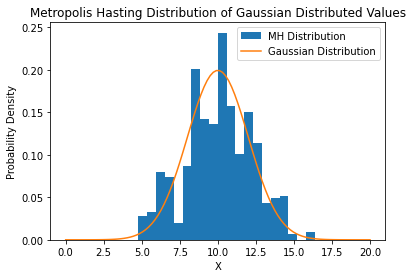

In [5]:

### Plotting Distribution Graph ###
normal_curve = [((np.exp((-(l-mu)**2)/(2*sigma**2))) / (sigma * np.sqrt(2*np.pi)) ) for l in np.linspace(mu-5*sigma,mu+5*sigma,100)] #curve of known distribution to compare against  
histogram_of_MH_predictions = plt.hist(MH_predictions,density=True, stacked=True,bins=number_of_stacks,label="MH Distribution")  # plot a histrogram of predicted values
plt.plot(np.linspace(mu-5*sigma,mu+5*sigma,100),normal_curve,label="Gaussian Distribution") #plot known distributions

# graph labels
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Metropolis Hasting Distribution of Gaussian Distributed Values')
plt.legend()
plt.show()



### Graph of MH Accepted Values

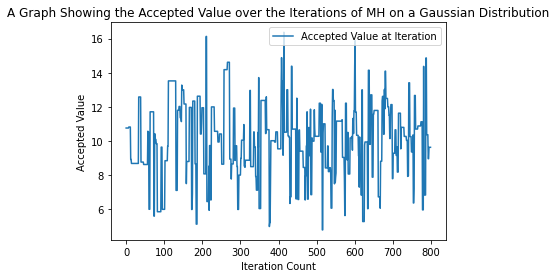

In [6]:
# the flat lines is when the MH algorithm rejects the precited value
plt.plot(MH_predictions ,label="Accepted Value at Iteration") 
plt.xlabel('Iteration Count')
plt.ylabel('Accepted Value')
plt.title('A Graph Showing the Accepted Value over the Iterations of MH on a Gaussian Distribution')
plt.legend()
plt.show()

## We know it should be guassian, lets check if it is...

In [7]:
'''
x_value = histogram_of_MH_predictions[1]
normal_curve_y_values= []

for i in range (0,len(x_value)-1):
    
    middle_x_value= (x_value[i] + x_value[i+1])/2
    
    multiplier = 1/(sigma*np.sqrt(2*np.pi))
    power = (-(middle_x_value-mu)*(x_value[i]-mu))/(2*sigma*sigma)
    
    y= multiplier * np.e**power
    
    normal_curve_y_values.append(y)
    
'''

'\nx_value = histogram_of_MH_predictions[1]\nnormal_curve_y_values= []\n\nfor i in range (0,len(x_value)-1):\n    \n    middle_x_value= (x_value[i] + x_value[i+1])/2\n    \n    multiplier = 1/(sigma*np.sqrt(2*np.pi))\n    power = (-(middle_x_value-mu)*(x_value[i]-mu))/(2*sigma*sigma)\n    \n    y= multiplier * np.e**power\n    \n    normal_curve_y_values.append(y)\n    \n'

### Mean and Covarience

In [8]:
#more samples gets closer to ideal results
print('mean should be',mu,'but is',np.mean(MH_predictions))
print('covarience is',np.cov(MH_predictions) )

mean should be 10 but is 10.03315959954282
covarience is 4.858493188684721


### Accumulative frequency

In [9]:
#computedensity curve going up vs what gaussian should be going up
x = sorted(MH_predictions)
y=[]
for i in range (0,len(MH_predictions)): #making a list for the frequency
    y.append(i)

#known gaussian distrubtion    
gauss = np.random.normal(mu, sigma, len(MH_predictions)*10)            
gauss=sorted(gauss)
y1=[]
for i in range (0,len(gauss)): #a list for the frequency ... a higher number was used to be more exact
    y1.append(i/10)



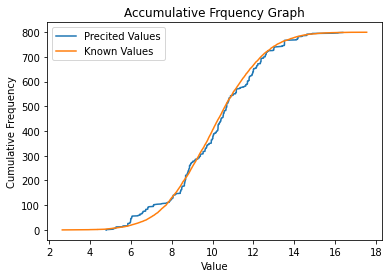

In [10]:
plt.plot(x, y,label="Precited Values")
plt.plot(gauss, y1, label="Known Values")

plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.title('Accumulative Frquency Graph')
plt.legend()
plt.show()

#### T-test & Z-Test

In [11]:
ttest=(statistics.mean(MH_predictions)-mu)/(sigma/math.sqrt(len(MH_predictions)))
print(ttest)

#If the value of z is greater than 1.96 or less than -1.96, the null hypothesis is rejected.
ztest=(statistics.mean(MH_predictions)-mu)/(sigma)
print(ztest)

0.46894755396317034
0.01657979977141011


## Jarque-Bera Test

In [ ]:
skewness = 

In [ ]:
kurtosis = 

In [ ]:
BS = n[((skewness**2)/6)+(((kurtosis-3)**2)/24)]